In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import numpy as np
import itertools  
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [3]:
train_data_path = 'potato1/train'
valid_data_path = 'potato1/test'
img_rows = 256
img_cols = 256
epochs = 50
batch_size = 33



In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=45,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   shear_range=0.4,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(valid_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        shuffle=False,
                                                        class_mode='categorical')


Found 687 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Convolution2D(64, (3, 3), input_shape=(img_rows, img_cols, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Convolution2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [6]:
model.fit_generator(train_generator,
                    steps_per_epoch=687/33 ,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=330/33
                   )

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
21/20 [==============================] - 80s 4s/step - loss: 2.5424 - acc: 0.5563 - val_loss: 0.6896 - val_acc: 0.5242
Epoch 2/50
21/20 [==============================] - 63s 3s/step - loss: 0.6886 - acc: 0.5591 - val_loss: 0.6810 - val_acc: 0.5242
Epoch 3/50
21/20 [==============================] - 66s 3s/step - loss: 0.6101 - acc: 0.6953 - val_loss: 0.3842 - val_acc: 0.8606
Epoch 4/50
21/20 [==============================] - 58s 3s/step - loss: 0.4301 - acc: 0.8365 - val_loss: 0.3792 - val_acc: 0.8273
Epoch 5/50
21/20 [==============================] - 60s 3s/step - loss: 0.3140 - acc: 0.8892 - val_loss: 0.2815 - val_acc: 0.9152
Epoch 6/50
21/20 [==============================] - 62s 3s/step - loss: 0.2990 - acc: 0.9070 - val_loss: 0.3240 - val_acc: 0.8788
Epoch 7/50
21/20 [==============================] - 66s 3s/step - loss: 0.1668 - acc: 0.9327 - val_loss: 0.2111 - val_acc: 0.9030
Epoch 8/50
21/20 [========================

In [7]:
Y_pred = model.predict_generator(validation_generator, 330/33)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Potato___healthy','Potato___Late_blight']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[137  36]
 [ 31 126]]
Classification Report
                      precision    recall  f1-score   support

    Potato___healthy       0.82      0.79      0.80       173
Potato___Late_blight       0.78      0.80      0.79       157

           micro avg       0.80      0.80      0.80       330
           macro avg       0.80      0.80      0.80       330
        weighted avg       0.80      0.80      0.80       330



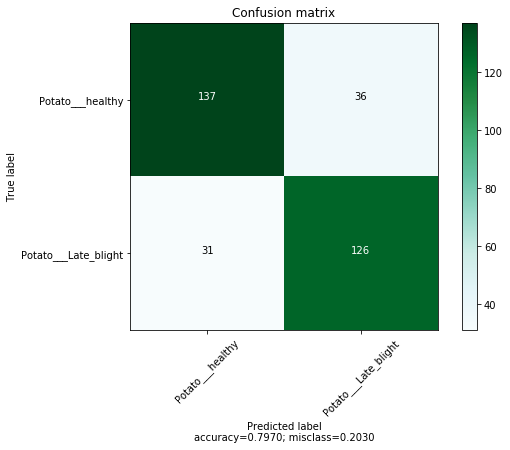

In [8]:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
  
   

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(confusion_matrix(validation_generator.classes, y_pred), target_names = ['Potato___healthy', 'Potato___Late_blight'],cmap='BuGn') 


In [9]:
class_dict = train_generator.class_indices
print(class_dict)
li = list(class_dict.keys())
print(li)

{'Potato___Late_blight': 0, 'Potato___healthy': 1}
['Potato___Late_blight', 'Potato___healthy']


Following is our prediction:


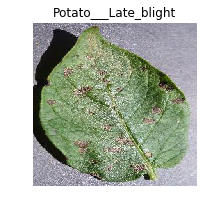

In [11]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "potato/test/Potato___Late_blight/3db185d7-7c05-42f9-b508-7a3883e50660___RS_Early.B 7011.JPG"
#image_path = "potato/test/Potato___Healthy/163ada72-4288-4f85-a3c1-feed23c8d1de___RS_HL 1940.JPG"
new_img = image.load_img(image_path, target_size=(256,256),color_mode='rgb')
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )


#ploting image with predicted class name        
plt.figure(figsize = (3,3))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()